Best Fit Polynomial 
 1.026 x^3 + 20.324 x^2 + 1.087 x + -23.968


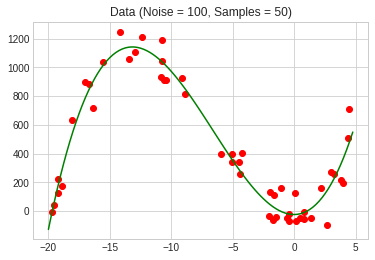

In [4]:
#Creating Dataset and Displaying Poly fit over it
import matplotlib.pyplot as plt
import numpy as np

def round_num(num, places):
    return int(num*(10**places))/(10**places)

noise_scale = 100
number_of_samples = 50
plt.style.use('seaborn-whitegrid')

x_data = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y_data = 5 * x_data + 20 * x_data**2 + 1 * x_data**3 + noise_scale*np.random.randn(number_of_samples, 1)
x_data = x_data.flatten()
y_data = y_data.flatten()

n_line = 100
x_fit = []
for i in range(0,n_line):
    x_fit.append((i/n_line)*25-20)

coeff = np.polyfit(x_data, y_data, 3)
print("Best Fit Polynomial \n", round_num(coeff[0], 3), "x^3 +", round_num(coeff[1], 3), "x^2 +", round_num(coeff[2], 3), "x +", round_num(coeff[3], 3))

y_fit = []
fit_func = np.poly1d(coeff)
for i in range(0,n_line):
    y_fit.append(fit_func(x_fit[i]))


plt.plot(x_data,y_data,'ro', x_fit, y_fit, 'g-')
plt.title("Data (Noise = %d, Samples = %d)"%(noise_scale, number_of_samples))
plt.show()

In [5]:
def convert_to_numpy(obj):
    if isinstance(obj, np.ndarray):
        return obj
    
    elif isinstance(obj, list):
        return np.array(obj)
    
    else:
        print("UNKNOWN TYPE --> RETURNING NONE")
        return None
    
def get_fitness(x_vals, Y, coeffs):
    x_vals = convert_to_numpy(x_vals)
    Y = convert_to_numpy(Y)
    coeffs = convert_to_numpy(coeffs)
    
    if ((x_vals is None) or (Y is None) or (coeffs is None)):
        print("Bad Data Type: Cannot calculate SSE")
        
    X = []
    degree = len(coeffs) - 1
    for x_val in x_vals:
        row = []
        for i in range(0, degree+1):
            row.append(x_val**(degree - i))
                       
        X.append(row)
    
    X = np.array(X)
    
    prediction = np.dot(X, coeffs)
    
    diff = prediction - Y
    
    RMSE = np.sqrt(np.dot(diff, diff)/len(x_vals))
    
    return RMSE
    

print(get_fitness(x_data, y_data, coeff))

97.26288418001783


/home/ronnie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ronnie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   Mutating a Member!
Epoch #0 --> 4286.06
   Best offspring:  [2.90, 26.50, -5.77, 30.57]
   Mutating a Member!
Epoch #1 --> 257.15
   Best offspring:  [0.55, 11.01, -30.89, -9.08]
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
Epoch #2 --> 213.65
   Best offspring:  [1.14, 22.98, -3.46, 22.87]
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
Epoch #3 --> 213.65
   Best offspring:  [1.14, 22.98, -3.46, 22.87]
   Mutating a Member!
Epoch #4 --> 110.09
   Best offspring:  [0.94, 18.74, -0.36, 19.50]
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
Epoch #5 --> 103.00
   Best offspring:  [0.95, 18.67, -1.15, 20.55]
   Mutating a Member!
Epoch #6 --> 101.53
   Best offspring:  [0.95, 18.88, -0.38, 12.05]
Epoch #7 --> 101.53
   Best offspring:  [0.95, 18.88, -0.38, 12.05]
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
   Mutating a Member!
   Mutating a 

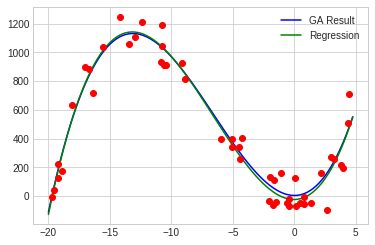

In [33]:
import pandas as pd   

def plot_best_fit(coeffs, truth, x_data, y_data):
    x_vals = []
    for i in range(0,n_line):
        x_vals.append((i/n_line)*25-20)
        
    x_vals = convert_to_numpy(x_vals)
    coeffs = convert_to_numpy(coeffs)
    truth = convert_to_numpy(truth)
    
    if ((x_vals is None)or (coeffs is None) or (truth is None)):
        print("Bad Data Type: Cannot Plot Data")
        
    coeff_degree = len(coeffs)
    truth_degree = len(truth)
    max_degree = coeff_degree
    if max_degree < truth_degree:
        max_degree = truth_degree
    
    
    X = []
    degree = max_degree - 1
    for x_val in x_vals:
        row = []
        for i in range(0, degree+1):
            row.append(x_val**(degree - i))
                       
        X.append(row)
    
    X = np.array(X)
    
    prediction = np.dot(X[:,(max_degree-coeff_degree):], coeffs)
    best_fit = np.dot(X[:,(max_degree-truth_degree):], truth)
    
    plt.plot(x_vals, prediction, 'b', x_vals, best_fit, 'g')
    plt.plot(x_data, y_data, 'ro')
    plt.legend(['GA Result', 'Regression'])
    plt.show()
    
def round_list(in_list):
    out_str = "["
    for i,el in enumerate(in_list):
        if i == len(in_list)-1:
            out_str += "%.2f]"%(el)
        else:
            out_str += "%.2f, "%(el)
            
    return out_str

def get_offspring(mom, dad, alpha):
    
    mask = np.random.randint(0,2,len(mom))
    reverse_mask = []
    for m in mask:
        reverse_mask.append(m^1) #XOR bitflip
            
    reverse_mask = np.array(reverse_mask)
    
    mom = (alpha*mask + (1-alpha)*reverse_mask)*mom
    dad = ((1-alpha)*mask + alpha*reverse_mask)*dad
    
    return (mom + dad).tolist()
    
def crossover(high_fits, number_to_replace):
    
    fitness = high_fits['fitness'].to_numpy()
    fit_sum = np.sum(fitness)
    probabilities = fitness/fit_sum
    
    #======= Create Pairs based on fitness ======
    # Value drawn randomly from 0-probability
    # Members are paired based on lowest number drawn
    #  --> ie the better the fit, the lower the probabilitiy, the better the chance of a low number
    mating = []
    for prob in probabilities.tolist():
        mating.append(np.random.uniform(0,prob,1))
    
    high_fits['mate'] = mating
    
    high_fits.sort_values(by=['mate'], inplace=True)
    
    #print(high_fits)
    
    pairs = int(high_fits.shape[0]/2)
    
    num_per_pair = int(number_to_replace/pairs)
    leftover = number_to_replace - num_per_pair*pairs
    
    #print("Number of Pairs:     ", pairs)
    #print("Number of Offspring: ", num_per_pair*pairs)
    #print("Leftover:            ",  leftover)
    
    kept_fits = high_fits['coeffs'].tolist()
    
    new_gen = [] + kept_fits
    
    for i in range(0, pairs):
        mom = kept_fits[i]
        dad = kept_fits[i+1]
        
        #print("Pair #", i)
        #print("  Mom:", round_list(mom))
        #print("  Dad:", round_list(dad))
        
        for j in range(0, num_per_pair):
            rand_alpha = np.random.uniform(0,2,1)
            offspring = get_offspring(mom, dad, rand_alpha)
            new_gen.append(offspring)
            #print("   --> Offspring %d (%.2f):"%(j, rand_alpha), round_list(offspring))
            
    for i in range(0, leftover):
        #print("Leftover #", i)
        pair = np.random.choice(int(high_fits.shape[0]), 2, replace=False)
        mom = kept_fits[pair[0]]
        dad = kept_fits[pair[1]]
        
        #print("  Mom:", round_list(mom))
        #print("  Dad:", round_list(dad))
        
        rand_alpha = np.random.uniform(0,2,1)
        offspring = get_offspring(mom, dad, rand_alpha)
        new_gen.append(offspring)
        
        #print("   --> Offspring %d (%.2f):"%(j, rand_alpha), round_list(offspring))
    
    #print("New Generation Length: ", len(new_gen))
        
    return new_gen

def mutate(member_list, mutation_rate, search_range):
    
    for member in member_list:
        rand_val = np.random.uniform(0,1,1)
        if rand_val < mutation_rate:
            print("   Mutating a Member!")
            #mutate member
            genes = len(member)
            gene_to_mutate = np.random.choice(genes, 1)
            #print("     Selecting gene", int(gene_to_mutate))
            #print("      --> Before", round_list(member))
            
            member[int(gene_to_mutate)] = np.random.uniform(search_range[0], search_range[1], 1)
            #print("      --> After", round_list(member))
    return member_list
            

#Genetic Algorithm Macros
pop = 100
keep = 20
mutation_chance = 0.03
threshold = 1.01*get_fitness(x_data, y_data, coeff)
max_iterations = 1000
max_degree = 3
search_range = (-50, 50)

diff_tolerance = 0.05
diff_tolerance_max = 10
diff_tolerance_cnt = 0

#Initialize random set
pop_members = []
for i in range(0, pop):
    temp_coeffs = np.random.uniform(search_range[0], search_range[1], (max_degree+1))
    pop_members.append(temp_coeffs.tolist())

epoch = 0
best_fit = 1000000000
best_offspring = None

while (best_fit > threshold):
    if epoch > max_iterations:
        print("******* Iterations Surpassed Max of", max_iterations,'**********')
        break

    #Get fitness of generation, sort based on fitness, and only keep N best fits
    population = []
    for member in pop_members:
        fit = get_fitness(x_data, y_data, member)
        population.append([member, fit])
    
    population = pd.DataFrame(population, columns = ['coeffs', 'fitness'])
    population.sort_values(by=['fitness'], inplace=True)
    
    to_keep = population[:keep]

    #Check to see if alogirthm has platoed 
    diff = abs(best_fit - to_keep['fitness'].to_numpy()[0])
    if diff < diff_tolerance:
        diff_tolerance_cnt += 1
        if diff_tolerance_cnt > diff_tolerance_max:
            print("Best Fitness did not change by more than %.2f for %d epochs"%(diff_tolerance, diff_tolerance_max))
            break
    else:
        diff_tolerance_cnt = 0
        
        
    #Reassign Best Fit and best option out of new generation
    best_fit = to_keep['fitness'].to_numpy()[0]
    best_offspring = to_keep['coeffs'].to_numpy()[0]
    
    #Repopulate for next generation
    pop_members = crossover(to_keep, (pop-keep))
    pop_members = mutate(pop_members, mutation_chance, search_range)
    
    print("Epoch #%d --> %.2f"%(epoch, best_fit))
    print("   Best offspring: ", round_list(best_offspring))
    
    
    epoch += 1
    
print("============================ FINAL ==============================")
print("Best Fit: %.2f"%(best_fit))
print("Optimal Solution Fitness: %.2f"%(get_fitness(x_data, y_data, coeff)))
print("Best offspring: ", round_list(best_offspring))

plot_best_fit(best_offspring, coeff, x_data, y_data)